# Ejercicio 1
[UVG Canvas](https://uvg.instructure.com/courses/37042/assignments/648291?module_item_id=939620)
## Autores
- Esteban Aldana
- Mariano Reyes
- Juan Carrera
- Luis Pedro Gonzalez
- Juan Carlos Bajan

## Instrucciones

- Revisar detalladamente el dataset y sacar conclusiones del mismo
    - Tipos de datos
    - Cantidad de columnas (campos)
    - Cantidad de filas (registros)
    - Estadísticas del dataset (media, moda, desviación estándar, máximo, mínimo, etc)
- Escribir una breve descripción de lo que representan cinco columnas del dataset
- Pensar en qué columnas se podrían usar como entrada para un modelo de machine
learning que resuelva un problema en el contexto del dataset (Recomendar una tarjeta de crédito, predecir ingresos, detectar desnutrición, etc) 
- Subir como archivo PDF
- El líder del equipo debe subir la tarea

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './FOOD-DATA-GROUP1.csv'
data = pd.read_csv(file_path)

# Análisis explorativo

In [18]:

print(f"n de columnas: {data.shape[1]}")
print(f"n de filas: {data.shape[0]}")


for i, column in enumerate(data.columns):
    print(f"{i}. {column}")


Cantidad de columnas: 37
Cantidad de filas: 551
0. Unnamed: 0.1
1. Unnamed: 0
2. food
3. Caloric Value
4. Fat
5. Saturated Fats
6. Monounsaturated Fats
7. Polyunsaturated Fats
8. Carbohydrates
9. Sugars
10. Protein
11. Dietary Fiber
12. Cholesterol
13. Sodium
14. Water
15. Vitamin A
16. Vitamin B1
17. Vitamin B11
18. Vitamin B12
19. Vitamin B2
20. Vitamin B3
21. Vitamin B5
22. Vitamin B6
23. Vitamin C
24. Vitamin D
25. Vitamin E
26. Vitamin K
27. Calcium
28. Copper
29. Iron
30. Magnesium
31. Manganese
32. Phosphorus
33. Potassium
34. Selenium
35. Zinc
36. Nutrition Density



Matriz de Correlación:


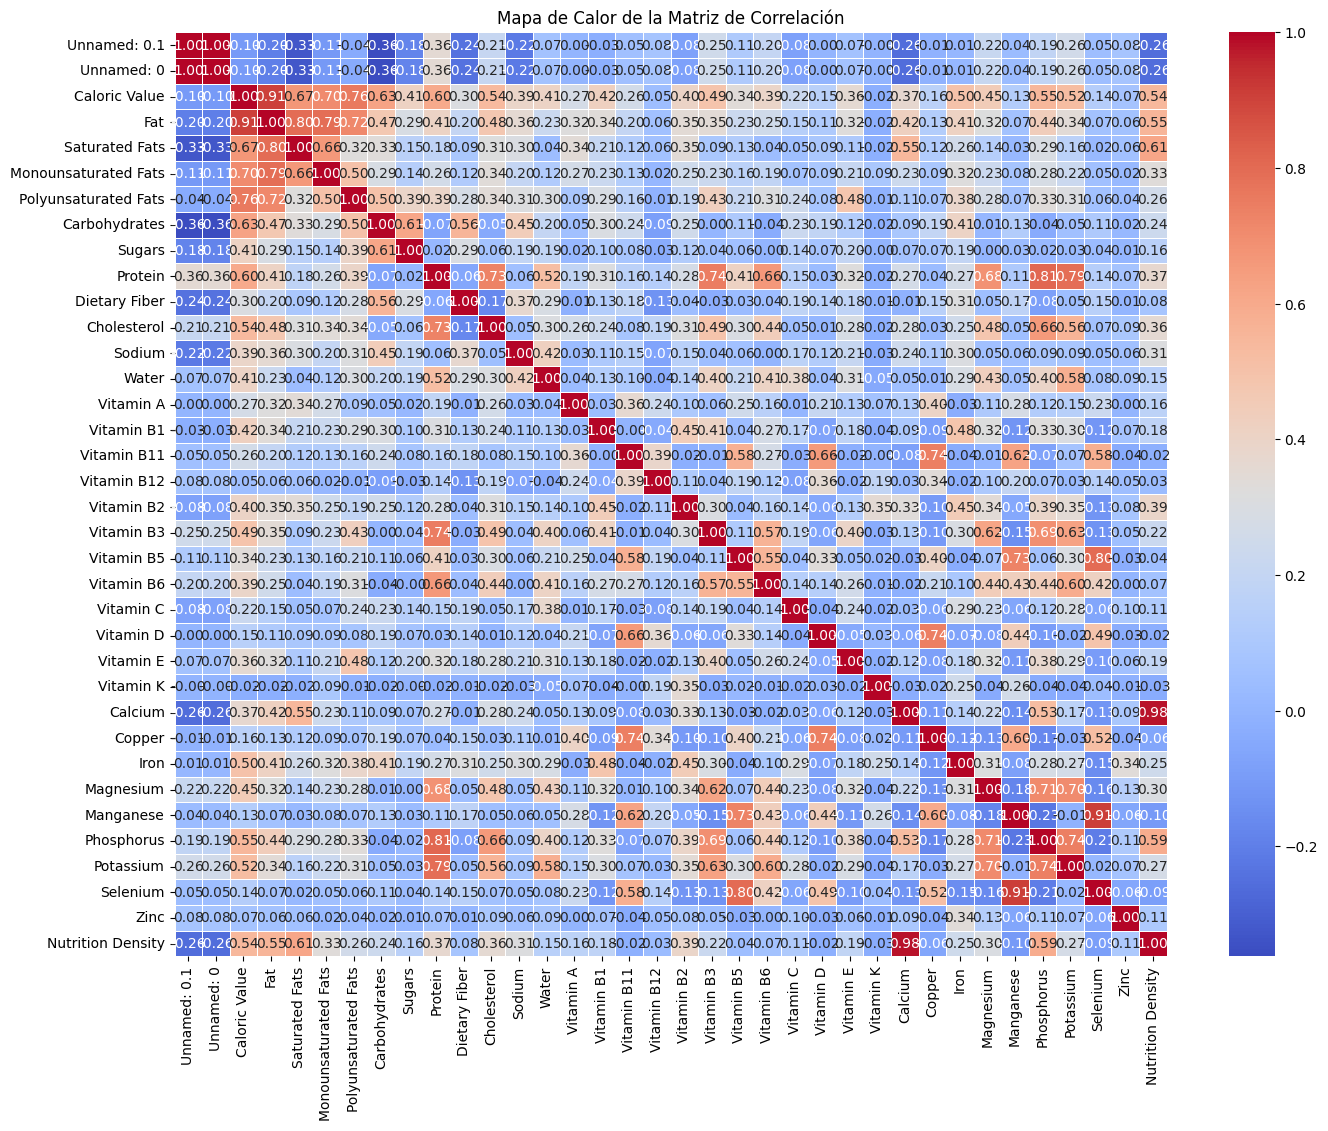

In [19]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()


# Display the correlation matrix
print("\nMatriz de Correlación:")
correlation_matrix_display = correlation_matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


In [28]:
# Select columns with significant correlations

correlation_threshold = 0.5
significant_correlations = correlation_matrix[abs(correlation_matrix) > correlation_threshold].stack().reset_index()
significant_correlations = significant_correlations[significant_correlations['level_0'] != significant_correlations['level_1']]
significant_correlations.columns = ['Variable 1', 'Variable 2', 'Correlación']

print("\nCorrelaciones Significativas (absolutas > 0.5):")
significant_correlations_display = significant_correlations

target_variable = 'Caloric Valor'
correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold]
correlated_features = correlated_features.drop(target_variable).sort_Valors(ascending=False)

print(f"\nCaracterísticas correlacionadas con '{target_variable}':")
correlated_features_display = correlated_features

print("\nRecomendaciones de Columnas para Modelos de Machine Learning:")
input_features = list(correlated_features.index)
print("Características de Entrada (Input Features):", input_features)
for i, feature in enumerate(input_features):
    print(f"\t{i+1}. {feature}")
print("Variable Objetivo (Target Variable):", target_variable)

# Display selected input features and target variable
print("\nPrimeras filas de las Características Seleccionadas y la Variable Objetivo:")
selected_features_display = data[input_features + [target_variable]].head()
print(selected_features_display)


Correlaciones Significativas (absolutas > 0.5):

Características correlacionadas con 'Caloric Value':

Recomendaciones de Columnas para Modelos de Machine Learning:
Características de Entrada (Input Features): ['Fat', 'Polyunsaturated Fats', 'Monounsaturated Fats', 'Saturated Fats', 'Carbohydrates', 'Protein', 'Phosphorus', 'Nutrition Density', 'Cholesterol', 'Potassium']
	1. Fat
	2. Polyunsaturated Fats
	3. Monounsaturated Fats
	4. Saturated Fats
	5. Carbohydrates
	6. Protein
	7. Phosphorus
	8. Nutrition Density
	9. Cholesterol
	10. Potassium
Variable Objetivo (Target Variable): Caloric Value

Primeras filas de las Características Seleccionadas y la Variable Objetivo:
    Fat  Polyunsaturated Fats  Monounsaturated Fats  Saturated Fats  \
0   5.0                 0.200                   1.3             2.9   
1  19.4                 0.800                   4.9            10.9   
2   3.6                 0.000                   0.9             2.3   
3   2.0                 0.002        



## Cinco columnas seleccionadas
1. Caloric Valor
2. Fat
3. Carbohydrates
4. Sodium
5. Protein




In [13]:
selected_columns = ["Caloric Valor", "Fat", "Carbohydrates", "Sodium", "Protein"]
for col in selected_columns:
    print(f"> {col}")
    print(data[col].describe())
    print("\n")

> Caloric Value
count     551.000000
mean      237.359347
std       199.235598
min         3.000000
25%        94.500000
50%       186.000000
75%       337.000000
max      1578.000000
Name: Caloric Value, dtype: float64


> Fat
count    551.000000
mean      10.766933
std       12.544196
min        0.000000
25%        2.500000
50%        6.600000
75%       14.400000
max       87.500000
Name: Fat, dtype: float64


> Carbohydrates
count    551.000000
mean      15.819036
std       20.289320
min        0.000000
25%        0.000000
50%        5.100000
75%       28.700000
max      128.300000
Name: Carbohydrates, dtype: float64


> Sodium
count    551.000000
mean       0.573205
std        0.636126
min        0.000000
25%        0.100000
50%        0.400000
75%        0.900000
max        6.100000
Name: Sodium, dtype: float64


> Protein
count    551.000000
mean      18.417857
std       18.932404
min        0.000000
25%        5.300000
50%       11.900000
75%       25.650000
max       86.900000


# Resumen
## Análisis Exploratorio
### Tipo de datos
El dataset contiene columnas con tipos de datos enteros (`int64`), flotantes (`float64`) y cadenas de texto (`object`).

### Dimensiones del dataset

| Dato | Valor | 
| ----- | ---- |
| No. Columnas | 37 | 
| No. Filas | 551 |

### Estadística Descriptiva
#### Caloric Valor

| Estadística | Valor      |
|-----------|------------|
| n     | 551.000000 |
| Media      | 237.359347 |
| Desviación Estándar       | 199.235598 |
| Min       | 3.000000   |
| 25%       | 94.500000  |
| 50%       | 186.000000 |
| 75%       | 337.000000 |
| Max       | 1578.000000|

#### Fat

| Estadística | Valor      |
|-----------|------------|
| n     | 551.000000 |
| Media      | 10.766933  |
| Desviación Estándar       | 12.544196  |
| Min       | 0.000000   |
| 25%       | 2.500000   |
| 50%       | 6.600000   |
| 75%       | 14.400000  |
| Max       | 87.500000  |

#### Carbohydrates

| Estadística | Valor      |
|-----------|------------|
| n     | 551.000000 |
| Media      | 15.819036  |
| Desviación Estándar       | 20.289320  |
| Min       | 0.000000   |
| 25%       | 0.000000   |
| 50%       | 5.100000   |
| 75%       | 28.700000  |
| Max       | 128.300000 |

#### Sodium

| Estadística | Valor      |
|-----------|------------|
| n     | 551.000000 |
| Media      | 0.573205   |
| Desviación Estándar       | 0.636126   |
| Min       | 0.000000   |
| 25%       | 0.100000   |
| 50%       | 0.400000   |
| 75%       | 0.900000   |
| Max       | 6.100000   |

#### Protein

| Estadística | Valor      |
|-----------|------------|
| n     | 551.000000 |
| Media      | 18.417857  |
| Desviación Estándar       | 18.932404  |
| Min       | 0.000000   |
| 25%       | 5.300000   |
| 50%       | 11.900000  |
| 75%       | 25.650000  |
| Max       | 86.900000  |
## Cinco columnas seleccionadas

- `Caloric Value`: Representa la cantidad de calorías en el alimento, medida en kilocalorías (kcal).
- `Fat`: Indica la cantidad total de grasa en el alimento, medida en gramos (g).
- `Carbohydrates`: Mide la cantidad de carbohidratos presentes en el alimento, en gramos (g).
- `Protein`: Representa la cantidad de proteínas en el alimento, en gramos (g).
- `Sodium`: Indica la cantidad de sodio en el alimento, medida en miligramos (mg).

## Selección de columnas para modelo de machine learning

- Para un modelo de machine learning que tenga como objetivo predecir el valor nutricional de un alimento o recomendar alimentos saludables, las siguientes columnas podrían ser usadas como características de entrada:
  - `Fat`
  - `Carbohydrates`
  - `Protein`
  - `Sodium`
  - `Cholesterol`
- La variable objetivo en este caso sería `Caloric Value`.